<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/07_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

## 🏡 Buildings' Efficiency - Image Data

Installing [OpenCV python package](https://pypi.org/project/opencv-python/)

In [8]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 22.5 MB/s eta 0:00:0000:0100:01


In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# to show images in colab:
#from google.colab.patches import cv2_imshow

[Image to download](https://www.donnamoderna.com/content/uploads/2023/04/IPA_FGR3813936-2000-830x625.jpg)

In [4]:
!wget -O ../.assets/cycles.jpg https://www.donnamoderna.com/content/uploads/2023/04/IPA_FGR3813936-2000-830x625.jpg

--2024-02-18 14:04:33--  https://www.donnamoderna.com/content/uploads/2023/04/IPA_FGR3813936-2000-830x625.jpg
Resolving www.donnamoderna.com (www.donnamoderna.com)... 104.22.61.227, 104.22.60.227, 172.67.42.82, ...
Connecting to www.donnamoderna.com (www.donnamoderna.com)|104.22.61.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124340 (121K) [image/jpeg]
Saving to: ‘../.assets/cycles.jpg’

../.assets/cycles.j 100%[===================>] 121.43K  --.-KB/s    in 0.1s    

2024-02-18 14:04:33 (951 KB/s) - ‘../.assets/cycles.jpg’ saved [124340/124340]



In [12]:
# opening an image
img = cv2.imread("../.assets/cycles.jpg")
print("Shape: ", img.shape)
img

Shape:  (625, 830, 3)


array([[[122, 115, 106],
        [119, 112, 103],
        [118, 109, 100],
        ...,
        [128, 130, 130],
        [130, 132, 132],
        [130, 132, 132]],

       [[122, 115, 106],
        [122, 115, 106],
        [125, 116, 107],
        ...,
        [128, 130, 130],
        [129, 131, 131],
        [129, 131, 131]],

       [[122, 113, 104],
        [121, 112, 103],
        [123, 114, 105],
        ...,
        [128, 130, 130],
        [128, 130, 130],
        [128, 130, 130]],

       ...,

       [[ 33,  38,  37],
        [ 61,  66,  64],
        [ 44,  49,  48],
        ...,
        [ 47,  47,  47],
        [ 52,  51,  53],
        [ 58,  57,  59]],

       [[ 29,  34,  32],
        [ 80,  85,  83],
        [ 64,  69,  67],
        ...,
        [ 46,  46,  46],
        [ 50,  49,  51],
        [ 55,  54,  56]],

       [[ 36,  41,  40],
        [ 43,  48,  47],
        [ 27,  32,  31],
        ...,
        [ 45,  45,  45],
        [ 47,  47,  47],
        [ 55,  55,  55]]

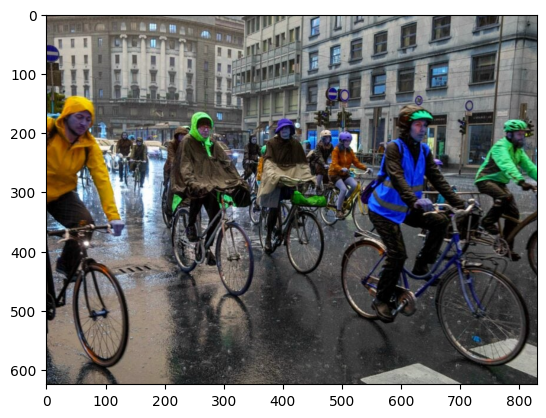

In [16]:
plt.imshow(img)

Compare this image to the [original one](https://www.donnamoderna.com/content/uploads/2023/04/IPA_FGR3813936-2000-830x625.jpg). The channels are inverted in our image. This is because OpenCV reads it blue-green-red by default, while matplotlib uses RGB-order when displaying it

We can see that our image is represented as a matrix of [cols, rows, channels]

It means that we can take parts of this matrix and change their values. We can actually manipulate this matrix just like any [numpy](https://numpy.org/doc/stable/index.html) matrix.

We can cut an image indicating which portion of it we want to take. The syntax is:

``image[from_row: to_row, from_col: to_col, from_ch: to_ch]``

taking all the rows (or all the columns or all the channels) would be written this way:

``image[:, :, :]``

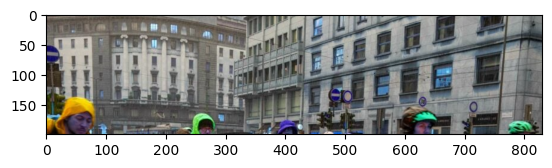

In [19]:
# cutting a horizontal slice, from row 0 to row 200
plt.imshow(img[0:200])

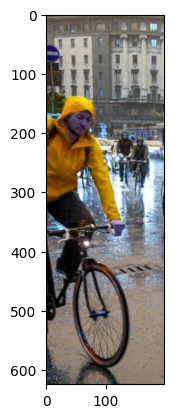

In [20]:
# cutting a vertical slice, from column 0 to row 200
# note: :, means that we take all the rows
plt.imshow(img[:, 0:200])

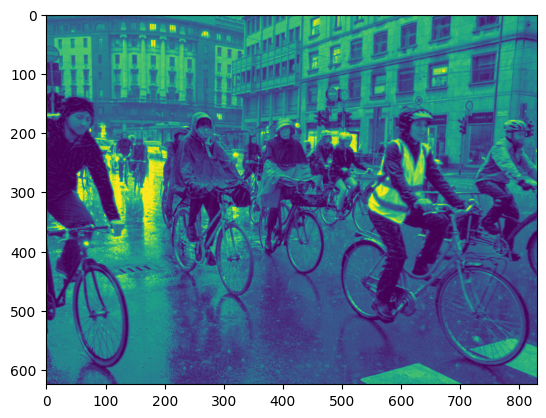

In [21]:
# taking only red dhannels
# note: :, means that we take all the rows
plt.imshow(img[:, :, 2:])

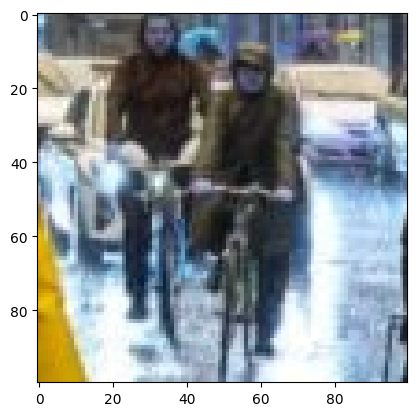

In [26]:
# cutting a vertical slice, from column 0 to row 200
# note: :, means that we take all the rows
plt.imshow(img[200:300, 100:200])

#### 🧩 Task I

Cut out the closest bike to the right, take blue channel only:

In [ ]:
plt.imshow(img)

#### ⚙️ Solution

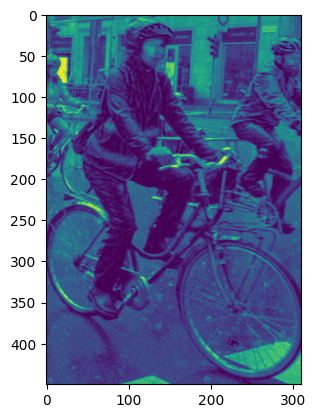

In [28]:
plt.imshow(img[150:600, 500:810, 0])

### Image transformations

Manipulating an image as a matrix becomes easier:

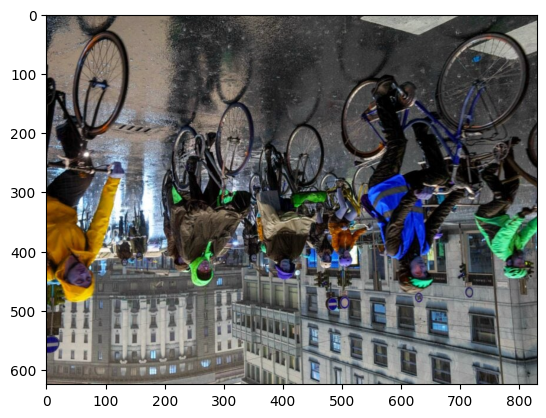

In [29]:
plt.imshow(img[::-1])

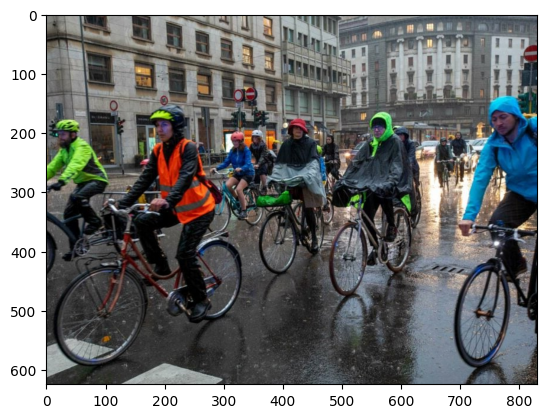

In [32]:
plt.imshow(img[:, ::-1, ::-1])

Transforming the image to grayscale. Note that image matrix now has one channel instead of 3:

[[113 110 107 107 110 112 113 112 110 115]
 [113 113 114 117 121 122 121 119 113 119]
 [111 110 112 116 121 125 125 124 117 121]
 [121 116 111 108 109 111 112 112  99 101]
 [ 92  89  85  84  86  89  90  91  96  97]
 [123 124 126 130 134 135 133 131 132 131]
 [112 111 111 111 110 106  99  94 101  99]
 [100  98  96  97  97  97  94  91  94  94]
 [106 105 105 105 104 100  93  88  93  93]
 [ 88  87  87  89  91  89  83  78  76  78]]


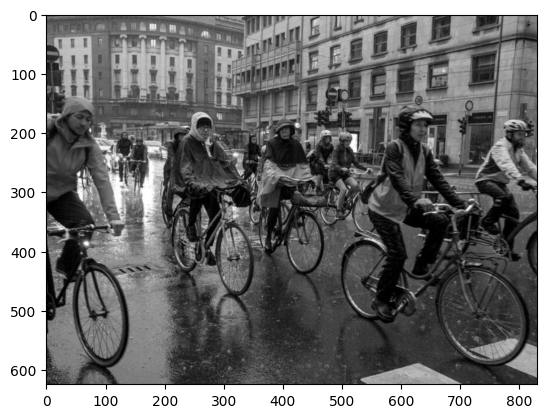

In [41]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_grey[0:10, 0:10])
plt.imshow(img_grey, cmap="grey")

We can even overwrite some pixels:

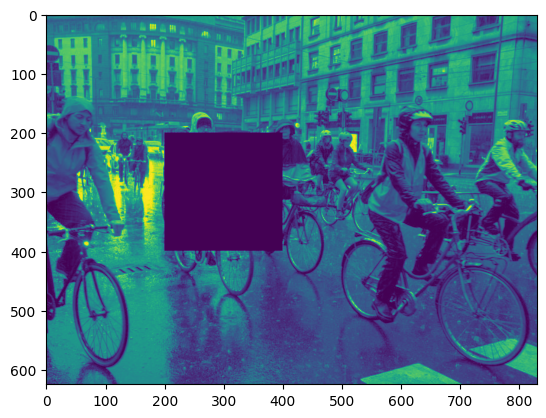

In [42]:
img_grey[200:400, 200:400] = 0
plt.imshow(img_grey)

or any specific color:

In [67]:
color_threshold = 100

np.where(img[:,:,1] > color_threshold)  # pixels where green channel is more than 200 (255 is max) as [y1,y2,y3,y4] [x1,x2,x3,x4]

(array([  0,   0,   0, ..., 624, 624, 624]),
 array([  0,   1,   2, ..., 699, 700, 701]))

In [68]:
rows, cols = np.where(img[:,:,1] > color_threshold) 


In [69]:
img[rows, cols] = [255,255,255]

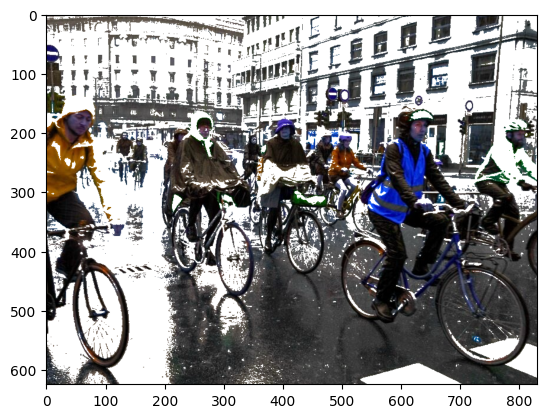

In [70]:

plt.imshow(img)

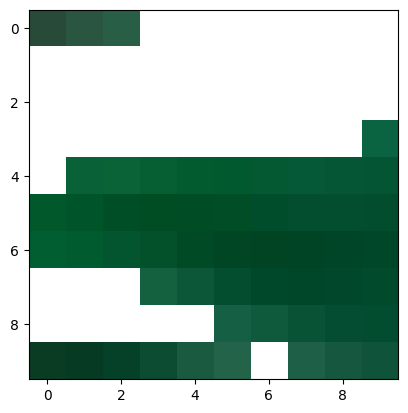

In [75]:
plt.imshow(img[270:280, 750:760])

In [74]:
img[275:280, 755:758]

array([[[  0,  77,  38],
        [  0,  77,  43],
        [  2,  78,  46]],

       [[  0,  70,  36],
        [  0,  68,  36],
        [  0,  68,  38]],

       [[  3,  78,  46],
        [  0,  72,  42],
        [  0,  70,  40]],

       [[ 21,  96,  68],
        [ 15,  89,  61],
        [  8,  82,  54]],

       [[ 34,  99,  74],
        [255, 255, 255],
        [ 30,  96,  71]]], dtype=uint8)

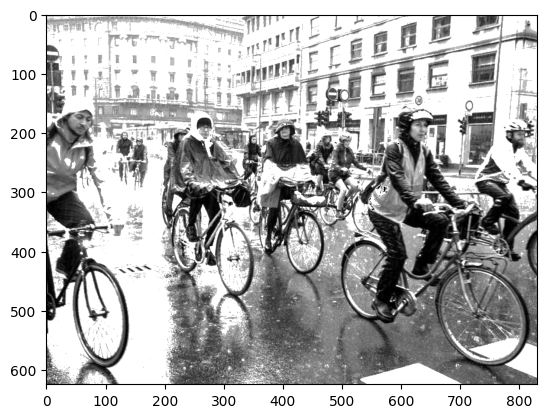

In [90]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey *2, cmap="grey")

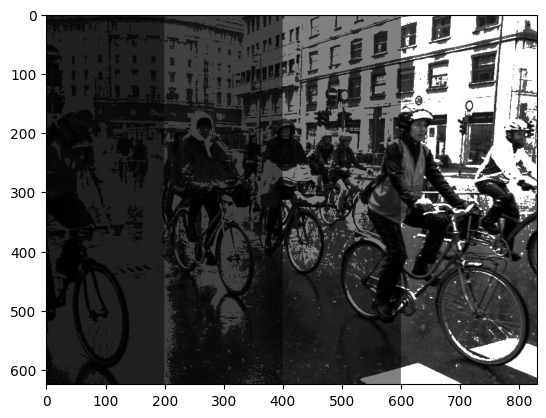

In [92]:
plt.imshow(np.concatenate([img_grey[:, :200] * 0.5, img_grey[:, 200:400] * 1., img_grey[:, 400:600] * 2. ,img_grey[:, 600:] * 4.], axis=1), cmap="grey")

### How we detect visual features

[![What is an edge](https://miro.medium.com/v2/resize:fit:1149/1*I_GeYmEhSEBWTbf_kgzrgQ.png)](https://www.youtube.com/watch?v=-pmUQ6RSejQ)

### Resources

* [OpenCV Official Tutorials](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
* [Quick intro to image processing](https://pythonprogramming.net/loading-images-python-opencv-tutorial/)